<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 90px">

# A/B Testing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import stats

In [2]:
# Read data
soap = pd.read_csv("data/soap.csv")
soap

,cube,level,pre,post
0,1,1,13.14,13.44
1,2,1,13.17,13.27
2,3,1,13.17,13.31
3,4,1,13.17,12.77
4,5,2,13.03,10.40
5,6,2,13.18,10.57
6,7,2,13.12,10.71
7,8,2,13.19,10.04
8,9,3,13.14,11.28
9,10,3,13.19,11.16


In [3]:
# Calculate weight loss
soap['pre'] - soap['post']

0    -0.30
1    -0.10
2    -0.14
3     0.40
4     2.63
5     2.61
6     2.41
7     3.15
8     1.86
9     2.03
10    2.26
11    1.82
dtype: float64

In [4]:
soap['wloss'] = soap['pre'] - soap['post']

In [5]:
# Some EDA
soap.groupby('level').mean()[['wloss']]

,wloss
level,
1,-0.0350
2,2.7000
3,1.9925


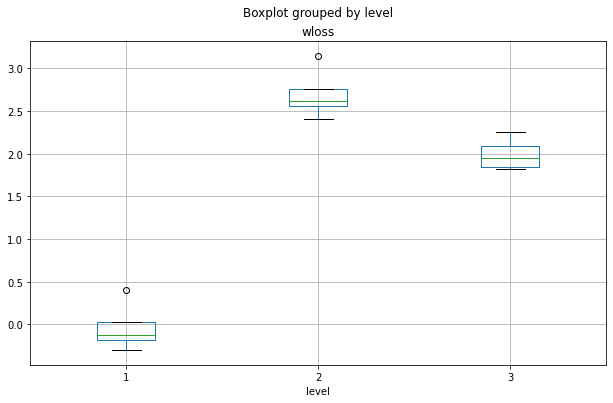

In [6]:
soap.boxplot(column='wloss', by='level', figsize=(10, 6));

## ANOVA Test of Soap Weight Loss
What are our hypotheses?

$$
H_0: ???
$$

$$
H_A: ???
$$

In [7]:
# Mindless SciPy one-way ANOVA test
soap1 = soap.loc[soap['level'] == 1, 'wloss']
soap2 = soap.loc[soap['level'] == 2, 'wloss']
soap3 = soap.loc[soap['level'] == 3, 'wloss']

stats.f_oneway(soap1, soap2, soap3)

F_onewayResult(statistic=104.45124716553275, pvalue=5.914409422315586e-07)

In [8]:
# Imports from statsmodels
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [9]:
# statsmodels follows the R pattern of using "formulas" to specify a model
# In order to specify a variable is categorical, use the C() function.

model = ols('wloss~ C(level)', soap).fit()

In [10]:
# Can summarize this just like other statsmodels models
model.summary()

/home/jacob/anaconda3/lib/python3.8/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wloss   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     104.5
Date:                Wed, 26 Jan 2022   Prob (F-statistic):           5.91e-07
Time:                        16:46:27   Log-Likelihood:               0.068908
No. Observations:                  12   AIC:                             5.862
Df Residuals:                       9   BIC:                             7.317
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0350      0.139     -0.252      0.807      -0.349       0.279
C(level)[T.2]     2.7350      0.196     13.923      0.000       2.291       3.179
C(level)[T.3]     2.0275      0.196     10.321      0.000       1.583       2.472
==============================================================================
Omnibus:                        2.324   Durbin-Watson:                   2.578
Prob(Omnibus):                  0.313   Jarque-Bera (JB):                1.594
Skew:                           0.836   Prob(JB):                        0.451
Kurtosis:                       2.372   Cond. No.                         3.73
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
# Here's where the magic happens...
# Let's look at this and go back to the deck.
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(level),2.0,16.122050,8.061025,104.451247,5.914409e-07
Residual,9.0,0.694575,0.077175,NaN,NaN


## ANOVA Test of Reaction Times
This will be a complete two-way ANOVA

In [ ]:
# Reaction time data
react = pd.read_csv("data/reaction.csv")
react

In [ ]:
# statsmodels formula
# The * operator in formulae means "both main effects and interaction terms"

# Fit model

In [ ]:
# Again - we can see the summary

In [ ]:
# But the ANOVA table is the good stuff